In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from functools import cmp_to_key
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
ratings = pd.read_csv('../data/ratings.csv', index_col=False)

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97510 entries, 0 to 97509
Data columns (total 12 columns):
id                97510 non-null int64
name              97510 non-null object
age               97510 non-null int64
position          97510 non-null object
nationality       97510 non-null object
overall           97510 non-null int64
potential         97510 non-null int64
number            97510 non-null int64
team              97510 non-null object
league            97510 non-null object
season            97510 non-null object
position_group    97510 non-null object
dtypes: int64(5), object(7)
memory usage: 8.9+ MB


In [5]:
ratings.sort_values(by=['overall'], inplace=True, ascending=False)

In [6]:
ratings.head()

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW


In [7]:
def compare_seasons(season_one, season_two):
    season_one = int(season_one.split('/')[0])
    season_two = int(season_two.split('/')[0])
    if season_one == season_two:
        return 0
    elif season_one > season_two:
        return 1
    else:
        return -1

In [8]:
seasons = list(ratings.season.unique())
seasons = sorted(seasons, key=cmp_to_key(compare_seasons))
seasons

['2004/2005',
 '2005/2006',
 '2006/2007',
 '2007/2008',
 '2008/2009',
 '2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2017',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020']

In [9]:
leagues = list(ratings.league.unique())

In [10]:
leagues

['Premier League',
 'Serie A TIM',
 'LaLiga Santander',
 'Bundesliga',
 'Ligue 1 Conforama',
 'Calcio B',
 'Eredivisie',
 'LaLiga SmartBank',
 'EFL Championship',
 'Bundesliga 2',
 'Domino’s Ligue 2']

In [11]:
top_five_leagues = ['Premier League','Serie A TIM','LaLiga Santander','Bundesliga', 'Ligue 1 Conforama']
top_five_leagues.sort()
top_five_leagues

['Bundesliga',
 'LaLiga Santander',
 'Ligue 1 Conforama',
 'Premier League',
 'Serie A TIM']

In [12]:
# remove duplicated players for better overall analysis for all FIFA
deduped_ratings = ratings.drop_duplicates(subset=['name'], keep ='first')

# Player Overalls Analysis

### Top 10 Players FIFA 20 - FIFA 05 (Inclusive)

In [13]:
deduped_ratings[0:10]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


### Deeper Dive into the Top 10 Players FIFA 20 - FIFA 05

Something that I find interesting to see is a count or indication of which players in FIFA made the most appearances in the Top 10 players year on year.

In [54]:
player_occurences = pd.DataFrame(columns=['name'])
for season in seasons:
    season_ratings = ratings[ratings['season'] == season]['name'][0:10]
    df = pd.DataFrame(season_ratings.values, columns=['name'])
    player_occurences = pd.concat([player_occurences, df])

In [63]:
player_occurences[0:10]

,name
0,Thierry Henry
1,Gianluigi Buffon
2,Zinedine Zidane
3,Ruud van Nistelrooy
4,Patrick Vieira
5,Alessandro Nesta
6,Oliver Kahn
7,Francesco Totti
8,Roy Makaay
9,Casillas


In [64]:
player_occurences[player_occurences['name'] == 'C. Ronaldo']

,name


Text(0.5, 1.0, 'No. of Occurencies of Player in Top 10 Players FIFA 20 - FIFA 05')

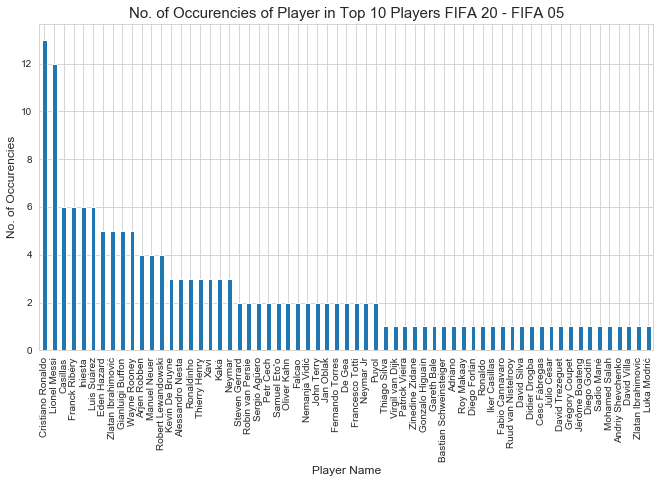

In [75]:
fig = plt.figure(figsize=(11,6))
player_occurences['name'].value_counts().plot(kind='bar')
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('No. of Occurencies', fontsize=12)
plt.title('No. of Occurencies of Player in Top 10 Players FIFA 20 - FIFA 05', fontsize=15)

Unsurprisngly Ronaldo and Messi have the most occurencues of any other player by a factor of almost two, speaking to their dominance of football over the past 16 years

### Top 20 Players FIFA 20 - FIFA 05 

In [15]:
deduped_ratings[0:20]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


### Top 50 Players FIFA 20 - FIFA 05

In [16]:
deduped_ratings[0:50]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


In [17]:
deduped_ratings[0:100]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
...,...,...,...,...,...,...,...,...,...,...,...,...
70899,70900,Dennis Bergkamp,35,CF,Netherlands,90,96,10,Arsenal,Premier League,2004/2005,FW
0,1,Marc-André ter Stegen,28,GK,Germany,90,93,1,FC Barcelona,LaLiga Santander,2019/2020,GK
66359,66360,Michael Ballack,28,LCM,Germany,90,99,13,Bayern Munich,Bundesliga,2004/2005,MD
66287,66288,Frank Lampard,26,RCM,England,90,96,8,Chelsea,Premier League,2004/2005,MD


## Deeper Dive into The 100 Rated players FIFA 20 - FIFA 05

In [18]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if absolute >= 5:
        return "{:.1f}%".format(pct, absolute)
    
def plot_breakdowns_for_data(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(aspect='equal'), figsize=(15,10))
    breakdown = ['nationality', 'league', 'position_group', 'season']
    start = 0
    for index, row in enumerate(axes):
        for j_index, ax in enumerate(row):
            data_breakdown = data[breakdown[start]].value_counts()
            values = data_breakdown.values
            indexes = data_breakdown.index

            wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                      textprops=dict(color="w"))

            plt.setp(autotexts, size=9, weight="bold")
            ax.set_title('{} Precentage Contribution to Top {} Players FIFA 20 - FIFA 05'.format(breakdown[start], len(data)), fontsize=11)
            ax.legend(wedges, indexes, bbox_to_anchor=(1,0,0.5,1))
            start = start + 1

    fig.tight_layout(pad=3)

### Nationality, League, Position Group and Season Contribution to TOP 100 Players FIFA 20 - FIFA 06

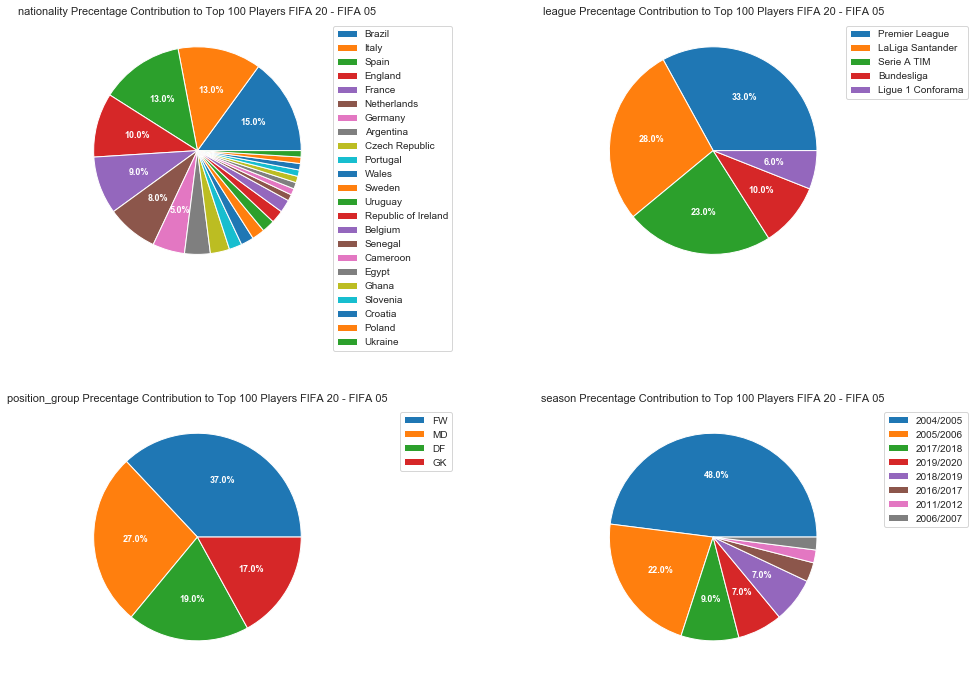

In [19]:
plot_breakdowns_for_data(deduped_ratings[0:100])

An interesting take away from the above pie charts and graph is the influence of Brazil, Having almost 8 times as few players in the First and Second Division of Europes top five leagues as the top contributor Spain, they have the highest percentage of players in the Top 100 Highest Rated Players as well as having an 8% contribution to the Top 100 Highest potential players. This speaks to the quality of Brazilian players that make it to Europe and play consistently.  

### Country V Player Distribution (FIFA 20 - FIFA 05)

In [20]:
top_50_countries = deduped_ratings['nationality'].value_counts()[0:50]

Text(0, 0.5, 'Number of Players')

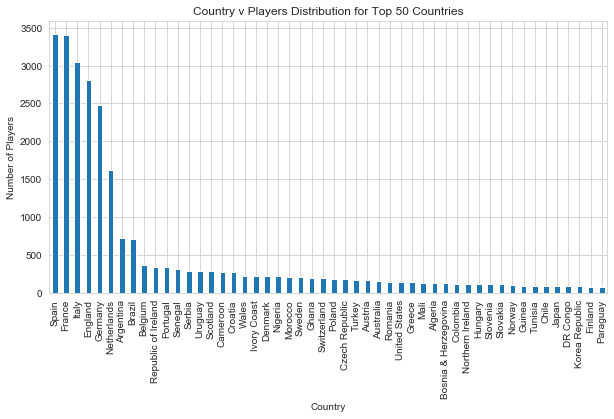

In [21]:
plt.figure(figsize=(10,5))
top_50_countries.plot(kind='bar')
plt.title('Country v Players Distribution for Top 50 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Players')

### Overalls Distribution for all Players in FIFA over the last 16 Years

### Potential and Overall Distributions for all Players in Fifa Over the last 16 Years

Text(0.5, 1.0, 'Overall Player Potential Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

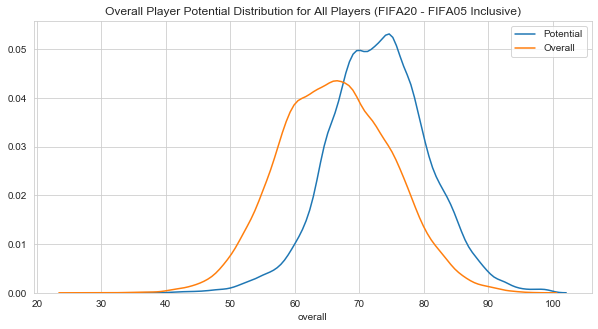

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(deduped_ratings['potential'], hist=False, label='Potential')
sns.distplot(deduped_ratings['overall'], hist=False, label='Overall')
plt.title('Overall Player Potential Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

Both the player overalls and player potentials for the past 16 years of Fifa follow a normal distribution, which makes sense, exceptional players are few and far between. The normal distribution of the overalls in the game indicate an effort by FIFA to balance the game as far as ratings are concerned 

## WonderKids Analysis

### Top 20 Wonderkids in Fifa over the last 16 years of the game

A wonder kid can be classed as a player under the age of 21, any player over this age will not be included in the criteria for this sort. This is of personal selection and the age can vary based on opinion

__Note__ As there are multiple versions of players over the various stages of fifa, when analysing the potential ratings of the players we are taking the highest potential version (we are optimists!!) as we assume this is the max cieling FIFA thought the player may hit

In [23]:
potential_sort = ratings.sort_values(by=['potential'], ascending=False)

In [24]:
potential_sort = potential_sort[potential_sort['age'] <= 21] # filter age
potential_sort.drop_duplicates(subset=['name'], inplace=True, keep='first') # drop duplicates keep highest overall version 

In [25]:
top_hundred_wonderkids = potential_sort[0:100]

### Nationality, League, Position Group and Season Contribution to TOP 100 Wonderkids FIFA 20 - FIFA 06 (Inclusive)

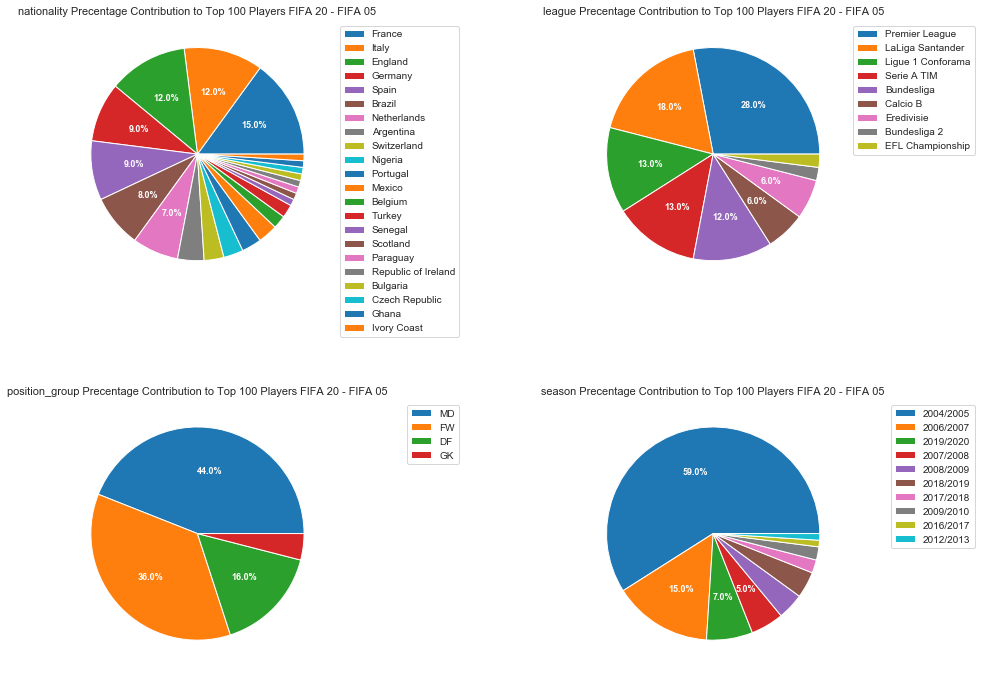

In [26]:
plot_breakdowns_for_data(top_hundred_wonderkids)

### Analysis into how many of the Top potential players from FIFA 20 - FIFA 06 Reached or came close to thei potential

For this analysis we are judging a player approaching/reaching their potential as coming within 1 rating of their potential or exceeding their potential allowing FIFA have a small margin of error in attempting to judge a players potential. The highest potential rating of the player will be compared to the overall of the player across the 16 years of FIFA used for this dataset

In [27]:
def check_proportion_of_players_reached(potential_dataframe, margin=1):
    player_potential_reached = {}
    player_names = potential_dataframe['name'].values
    for name in player_names:
        player_potential = top_hundred_wonderkids[top_hundred_wonderkids['name'] == name]['potential'].values[0]
        player_history = ratings[ratings['name'] == name].sort_values(by='age')
        for index, history in player_history.iterrows():
            data_dict = {}
            diff = player_potential - history['overall']
            if diff == -margin or diff == margin:
                data_dict['potential'] = player_potential
                data_dict['overall'] = history['overall']
                data_dict['season'] = history['season']
                data_dict['age'] = history['age']
                player_potential_reached[name] = data_dict
                break
    return player_potential_reached

In [28]:
check_proportion_of_players_reached(top_hundred_wonderkids)

{'Lionel Messi': {'potential': 95,
  'overall': 94,
  'season': '2011/2012',
  'age': 24},
 'Cristiano Ronaldo': {'potential': 92,
  'overall': 91,
  'season': '2007/2008',
  'age': 22}}

Using a margin of one rating either side of the potential rating, the only two players that FIFA have correcty determined their potential are Cristiano Ronaldo and Lionel Messi (Are you really surprised lol). In conclusion as far as the Top 100 rated wonderkids are concerned FIFA has a success rate of 2% when attempting to determine the future overall of any player.

It must also be noted that this particular analysis is not exhaustive as the entire dataset is not used. Using the entire dataset would give a much better indication of FIFA's success in determining potential ability. To complete this analysis a method of dropping the players that have already been analysed (inplace) would have to be used to reduce the processin time it would take to complete this analysis

In [29]:
check_proportion_of_players_reached(top_hundred_wonderkids, 2)

{'Lionel Messi': {'potential': 95,
  'overall': 93,
  'season': '2014/2015',
  'age': 28},
 'Sergio Ramos': {'potential': 92,
  'overall': 90,
  'season': '2017/2018',
  'age': 32},
 'Cristiano Ronaldo': {'potential': 92,
  'overall': 94,
  'season': '2016/2017',
  'age': 32},
 'Eden Hazard': {'potential': 91,
  'overall': 89,
  'season': '2016/2017',
  'age': 26},
 'Diego': {'potential': 90, 'overall': 88, 'season': '2007/2008', 'age': 22}}

Using a margin of 2 ratings, the sucess rate of overall determination for FIFA increases to 5% Sergio Ramos, Hazard and Diego are added to the players that FIFA deemed to have reached their potential. An interesting note is the fact that within the top 100 wonderkids in this data set C. Ronaldo is the only player to actually exceed the highest potential given to him by FIFA

### Observation and Analysis

From the above analysis, more specifically the seasonal precentage contribution of the top hundred rated players and the top hundred wonderkids over the 16 year interval of FIFA the largest contributions are coming from much older FIFAs, this lead to an investigation on the progression of how players have been rated (overall and potential) over the last 16 years of FIFA

In [30]:
overall_potential_dict = {
    'max_overall': [],
    'mean_overall': [],
    'max_potential': [],
    'mean_potential': []
}
for season in seasons:
    current_season = ratings[ratings['season'] == season]
    overall_potential_dict['mean_overall'].append(current_season['overall'].mean())
    overall_potential_dict['max_overall'].append(current_season['overall'].max())
    overall_potential_dict['mean_potential'].append(current_season['potential'].mean())
    overall_potential_dict['max_potential'].append(current_season['potential'].max())

Text(0.5, 1.0, 'Average and Max Potential and Overall Year on Year (2020 - 2005)')

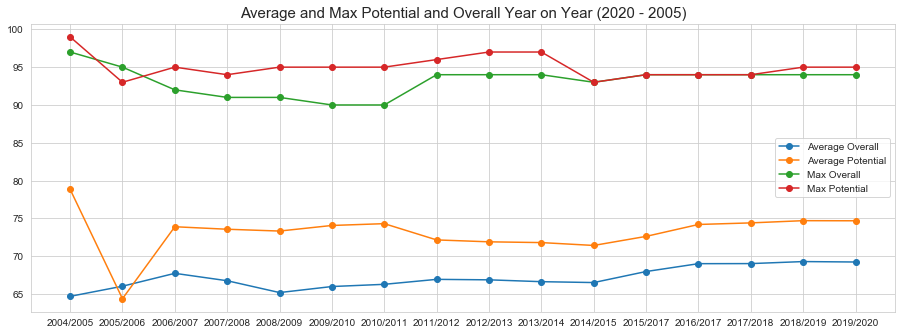

In [31]:
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(seasons, overall_potential_dict['mean_overall'], marker='o', label='Average Overall')
axes.plot(seasons, overall_potential_dict['mean_potential'], marker='o', label='Average Potential')
axes.plot(seasons, overall_potential_dict['max_overall'], marker='o', label='Max Overall')
axes.plot(seasons, overall_potential_dict['max_potential'], marker='o', label='Max Potential')
axes.legend()
plt.title('Average and Max Potential and Overall Year on Year (2020 - 2005)', fontsize=15)

A small conclusion that can be made from the data up till now is according to fifa Football was at its peak in 20004/2005. Having the highest max and average overalls and potentials as well as contributing the most to the Top 100 Rated players and Top 100 Wonderkids in the 16 year range.

### The Journey of Christiano Ronaldo and Lionel Messi
Being the most dominant players of my life time and probably of all time, and due to the constant debate around which of the two players are is better than the other, it would be interesting to see how FIFA has rated both of the players over both their time in the game

In [32]:
ronaldo_and_messi = ratings[(ratings['name'] == 'C. Ronaldo') | (ratings['name'] == 'Cristiano Ronaldo') | (ratings['name'] == 'Lionel Messi')].sort_values(by='age')

In [33]:
def clean_ronaldo(name):
    if name == 'C. Ronaldo':
        return 'Cristiano Ronaldo'
    else:
        return name

In [34]:
ronaldo_and_messi['name'] = ronaldo_and_messi['name'].apply(lambda name: clean_ronaldo(name))

In [35]:
def get_ages_and_overalls(data):
    data_dict = {}
    names = data['name'].values
    for name in names:
        tmp = {}
        tmp['overalls'] = ronaldo_and_messi[ronaldo_and_messi['name'] == name]['overall'].values
        tmp['ages'] = ronaldo_and_messi[ronaldo_and_messi['name'] == name]['age'].values
        tmp['max_overall'] = ronaldo_and_messi[ronaldo_and_messi['name'] == name]['overall'].max()
        tmp['min_overall'] = ronaldo_and_messi[ronaldo_and_messi['name'] == name]['overall'].min()
        data_dict[name] = tmp
    return data_dict

In [36]:
ron_mess_dict = get_ages_and_overalls(ronaldo_and_messi)

In [37]:
ron_mess_dict

{'Lionel Messi': {'overalls': array([78, 84, 86, 90, 90, 90, 94, 94, 94, 93, 94, 93, 94, 94, 94]),
  'ages': array([18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 32]),
  'max_overall': 94,
  'min_overall': 78},
 'Cristiano Ronaldo': {'overalls': array([88, 91, 87, 91, 91, 89, 89, 92, 92, 92, 92, 93, 94, 94, 94, 93]),
  'ages': array([19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
  'max_overall': 94,
  'min_overall': 87}}

In [38]:
ron_mess_dict['Lionel Messi']['ages'][len(ron_mess_dict['Lionel Messi']['overalls']) -1] = 33

In [39]:
ron_mess_dict

{'Lionel Messi': {'overalls': array([78, 84, 86, 90, 90, 90, 94, 94, 94, 93, 94, 93, 94, 94, 94]),
  'ages': array([18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33]),
  'max_overall': 94,
  'min_overall': 78},
 'Cristiano Ronaldo': {'overalls': array([88, 91, 87, 91, 91, 89, 89, 92, 92, 92, 92, 93, 94, 94, 94, 93]),
  'ages': array([19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
  'max_overall': 94,
  'min_overall': 87}}

Text(0, 0.5, 'Overall')

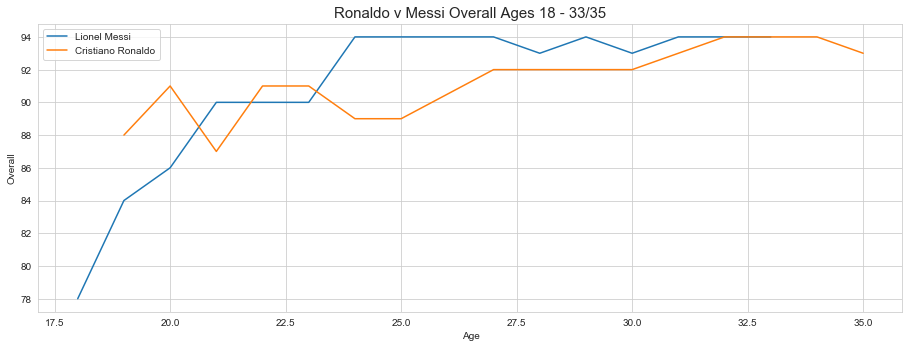

In [40]:
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(ron_mess_dict['Lionel Messi']['ages'], ron_mess_dict['Lionel Messi']['overalls'], label='Lionel Messi')
axes.plot(ron_mess_dict['Cristiano Ronaldo']['ages'], ron_mess_dict['Cristiano Ronaldo']['overalls'], label='Cristiano Ronaldo')
axes.legend()

plt.title('Ronaldo v Messi Overall Ages 18 - 33/35', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Overall')

Both Ronaldo and Messi peak at the same 94 overll Rating
Messi has the largest rise in overall going from 78 overall to 86 rated in the span of 2 years (18 - 20) 
Ronaldo however has always been fairly high rated from young, being rated above 88 as early as  18 years of age.
Messi however has managed to stay at the peak rating of 84 a lot longer than Ronaldo has even though there is an age gap of around two years betweeen them.